In [30]:
from openslide import open_slide
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import tifffile as tiff

In [31]:
slide = open_slide("F:/images SS/svs files/Normal Lymphnode.svs")

In [32]:
from ipynb.fs.full.normalize_HnE import norm_HnE

In [33]:
smaller_region = slide.read_region((16000,16000), 0, (1024,1024))
smaller_region_RGB = smaller_region.convert('RGB')
smaller_region_np = np.array(smaller_region_RGB)

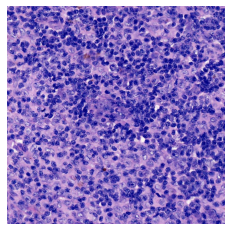

In [34]:
plt.axis('off')
plt.imshow(smaller_region_np)

In [35]:
norm_img, H_img, E_img = norm_HnE(smaller_region_np, Io=240, alpha=1, beta=0.15)

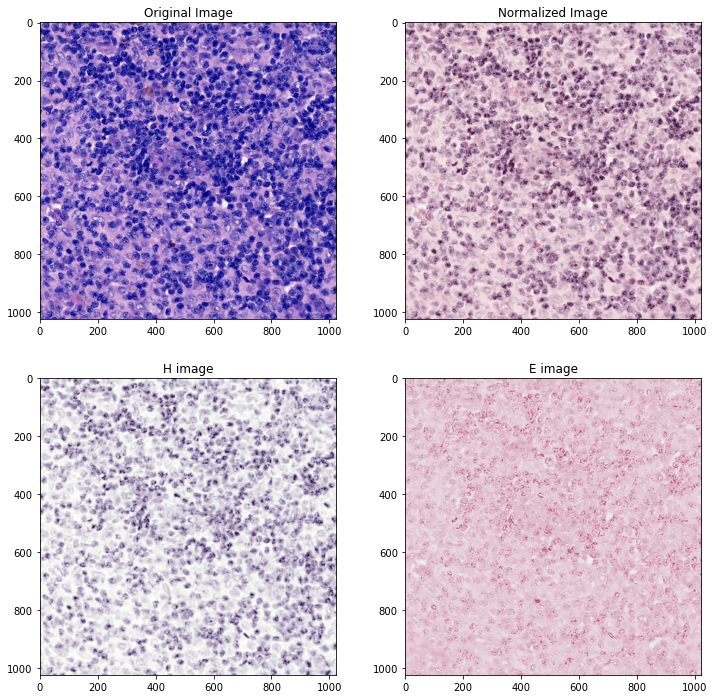

In [36]:
plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.title('Original Image')
plt.imshow(smaller_region_np)
plt.subplot(222)
plt.title('Normalized Image')
plt.imshow(norm_img)
plt.subplot(223)
plt.title('H image')
plt.imshow(H_img)
plt.subplot(224)
plt.title('E image')
plt.imshow(E_img)
plt.show()

In [57]:
blank = tiff.imread("F:/images SS/saved tiles/original tiles/0_0.tiff")

In [58]:
norm_img, H_img, E_img = norm_HnE(blank, Io=240, alpha=1, beta=0.15)

ValueError: cannot reshape array of size 262144 into shape (3)

In [59]:
def find_mean_std_pixel_value(img_list):
    
    avg_pixel_value = []
    stddev_pixel_value= []
    for file in img_list:
        image = tiff.imread(file)
        avg = image.mean()
        std = image.std()
        avg_pixel_value.append(avg)
        stddev_pixel_value.append(std)
        
    avg_pixel_value = np.array(avg_pixel_value)  
    stddev_pixel_value=np.array(stddev_pixel_value)
        
    print("Average pixel value for all images is:", avg_pixel_value.mean())
    print("Average std dev of pixel value for all images is:", stddev_pixel_value.mean())
    
    return(avg_pixel_value, stddev_pixel_value)

In [60]:
import glob
orig_tile_dir_name = "F:/images ss/saved tiles/original tiles/"

In [61]:
blank_img_list=(glob.glob(orig_tile_dir_name+"blank/*.tiff"))
partial_img_list=(glob.glob(orig_tile_dir_name+"partial/*.tiff"))
good_img_list=(glob.glob(orig_tile_dir_name+"good/*.tiff"))

In [62]:
blank_img_stats = find_mean_std_pixel_value(blank_img_list)
partial_img_stats = find_mean_std_pixel_value(partial_img_list)
good_img_stats = find_mean_std_pixel_value(good_img_list)

Average pixel value for all images is: 254.83940728505453
Average std dev of pixel value for all images is: 0.7001430981656062
Average pixel value for all images is: 253.66992690346459
Average std dev of pixel value for all images is: 4.8038444139797924
Average pixel value for all images is: 214.07104583013626
Average std dev of pixel value for all images is: 39.91730478038996


In [63]:
from openslide.deepzoom import DeepZoomGenerator

In [64]:
tiles = DeepZoomGenerator(slide, tile_size=256, overlap=0, limit_bounds=False)

In [65]:
print("The number of levels in the tiles object are: ", tiles.level_count)
print("The dimensions of data in each level are: ", tiles.level_dimensions)
print("Total number of tiles = : ", tiles.tile_count)

The number of levels in the tiles object are:  17
The dimensions of data in each level are:  ((1, 1), (2, 2), (3, 3), (5, 5), (9, 10), (18, 19), (35, 38), (70, 76), (140, 152), (280, 303), (560, 605), (1120, 1210), (2239, 2419), (4478, 4837), (8955, 9674), (17909, 19347), (35817, 38693))
Total number of tiles = :  28409


In [66]:
cols, rows = tiles.level_tiles[16]

In [71]:
orig_tile_dir_name = "F:/images ss/saved tiles/original tiles/"
norm_tile_dir_name = "F:/images ss/saved tiles/normalized tiles/"
H_tile_dir_name = "F:/images ss/saved tiles/H tiles/"
E_tile_dir_name = "F:/images ss/saved tiles/E tiles/"

In [72]:
for row in range(rows):
    for col in range(cols):
        tile_name = str(col) + "_" + str(row)
        temp_tile = tiles.get_tile(16, (col, row))
        temp_tile_RGB = temp_tile.convert('RGB')
        temp_tile_np = np.array(temp_tile_RGB)
        tiff.imsave(orig_tile_dir_name+tile_name + ".tiff", temp_tile_np)
        
        if temp_tile_np.mean() < 230 and temp_tile_np.std() > 15:
            print("Processing tile number:", tile_name)
            norm_img, H_img, E_img = norm_HnE(temp_tile_np, Io=240, alpha=1, beta=0.15)     
            
            tiff.imsave(norm_tile_dir_name+tile_name + "_norm.tif", norm_img)
            tiff.imsave(H_tile_dir_name+tile_name + "_H.tif", H_img)
            tiff.imsave(E_tile_dir_name+tile_name + "_E.tif", E_img)
            
        else:
            print("NOT PROCESSING TILE:", tile_name)

NOT PROCESSING TILE: 0_0
NOT PROCESSING TILE: 1_0
NOT PROCESSING TILE: 2_0
NOT PROCESSING TILE: 3_0
NOT PROCESSING TILE: 4_0
NOT PROCESSING TILE: 5_0
NOT PROCESSING TILE: 6_0
NOT PROCESSING TILE: 7_0
NOT PROCESSING TILE: 8_0
NOT PROCESSING TILE: 9_0
NOT PROCESSING TILE: 10_0
NOT PROCESSING TILE: 11_0
NOT PROCESSING TILE: 12_0
NOT PROCESSING TILE: 13_0
NOT PROCESSING TILE: 14_0
NOT PROCESSING TILE: 15_0
NOT PROCESSING TILE: 16_0
NOT PROCESSING TILE: 17_0
NOT PROCESSING TILE: 18_0
NOT PROCESSING TILE: 19_0
NOT PROCESSING TILE: 20_0
NOT PROCESSING TILE: 21_0
NOT PROCESSING TILE: 22_0
NOT PROCESSING TILE: 23_0
NOT PROCESSING TILE: 24_0
NOT PROCESSING TILE: 25_0
NOT PROCESSING TILE: 26_0
NOT PROCESSING TILE: 27_0
NOT PROCESSING TILE: 28_0
NOT PROCESSING TILE: 29_0
NOT PROCESSING TILE: 30_0
NOT PROCESSING TILE: 31_0
NOT PROCESSING TILE: 32_0
NOT PROCESSING TILE: 33_0
NOT PROCESSING TILE: 34_0
NOT PROCESSING TILE: 35_0
NOT PROCESSING TILE: 36_0
NOT PROCESSING TILE: 37_0
NOT PROCESSING TILE: 3

NOT PROCESSING TILE: 37_2
NOT PROCESSING TILE: 38_2
NOT PROCESSING TILE: 39_2
NOT PROCESSING TILE: 40_2
NOT PROCESSING TILE: 41_2
NOT PROCESSING TILE: 42_2
NOT PROCESSING TILE: 43_2
NOT PROCESSING TILE: 44_2
NOT PROCESSING TILE: 45_2
NOT PROCESSING TILE: 46_2
NOT PROCESSING TILE: 47_2
NOT PROCESSING TILE: 48_2
NOT PROCESSING TILE: 49_2
NOT PROCESSING TILE: 50_2
NOT PROCESSING TILE: 51_2
NOT PROCESSING TILE: 52_2
NOT PROCESSING TILE: 53_2
NOT PROCESSING TILE: 54_2
NOT PROCESSING TILE: 55_2
NOT PROCESSING TILE: 56_2
NOT PROCESSING TILE: 57_2
NOT PROCESSING TILE: 58_2
NOT PROCESSING TILE: 59_2
NOT PROCESSING TILE: 60_2
NOT PROCESSING TILE: 61_2
NOT PROCESSING TILE: 62_2
NOT PROCESSING TILE: 63_2
NOT PROCESSING TILE: 64_2
NOT PROCESSING TILE: 65_2
NOT PROCESSING TILE: 66_2
NOT PROCESSING TILE: 67_2
NOT PROCESSING TILE: 68_2
NOT PROCESSING TILE: 69_2
NOT PROCESSING TILE: 70_2
NOT PROCESSING TILE: 71_2
NOT PROCESSING TILE: 72_2
NOT PROCESSING TILE: 73_2
NOT PROCESSING TILE: 74_2
NOT PROCESSI

NOT PROCESSING TILE: 69_4
NOT PROCESSING TILE: 70_4
NOT PROCESSING TILE: 71_4
Processing tile number: 72_4
Processing tile number: 73_4
Processing tile number: 74_4
NOT PROCESSING TILE: 75_4
Processing tile number: 76_4
Processing tile number: 77_4
NOT PROCESSING TILE: 78_4
Processing tile number: 79_4
Processing tile number: 80_4
Processing tile number: 81_4
Processing tile number: 82_4
Processing tile number: 83_4
Processing tile number: 84_4
Processing tile number: 85_4
Processing tile number: 86_4
Processing tile number: 87_4
Processing tile number: 88_4
Processing tile number: 89_4
Processing tile number: 90_4
Processing tile number: 91_4
Processing tile number: 92_4
Processing tile number: 93_4
Processing tile number: 94_4
NOT PROCESSING TILE: 95_4
NOT PROCESSING TILE: 96_4
NOT PROCESSING TILE: 97_4
NOT PROCESSING TILE: 98_4
NOT PROCESSING TILE: 99_4
NOT PROCESSING TILE: 100_4
NOT PROCESSING TILE: 101_4
NOT PROCESSING TILE: 102_4
NOT PROCESSING TILE: 103_4
NOT PROCESSING TILE: 10

Processing tile number: 94_6
Processing tile number: 95_6
Processing tile number: 96_6
NOT PROCESSING TILE: 97_6
NOT PROCESSING TILE: 98_6
NOT PROCESSING TILE: 99_6
NOT PROCESSING TILE: 100_6
NOT PROCESSING TILE: 101_6
NOT PROCESSING TILE: 102_6
NOT PROCESSING TILE: 103_6
NOT PROCESSING TILE: 104_6
NOT PROCESSING TILE: 105_6
NOT PROCESSING TILE: 106_6
NOT PROCESSING TILE: 107_6
NOT PROCESSING TILE: 108_6
NOT PROCESSING TILE: 109_6
NOT PROCESSING TILE: 110_6
NOT PROCESSING TILE: 111_6
NOT PROCESSING TILE: 112_6
NOT PROCESSING TILE: 113_6
NOT PROCESSING TILE: 114_6
NOT PROCESSING TILE: 115_6
NOT PROCESSING TILE: 116_6
NOT PROCESSING TILE: 117_6
NOT PROCESSING TILE: 118_6
NOT PROCESSING TILE: 119_6
NOT PROCESSING TILE: 120_6
NOT PROCESSING TILE: 121_6
NOT PROCESSING TILE: 122_6
NOT PROCESSING TILE: 123_6
NOT PROCESSING TILE: 124_6
NOT PROCESSING TILE: 125_6
NOT PROCESSING TILE: 126_6
NOT PROCESSING TILE: 127_6
NOT PROCESSING TILE: 128_6
NOT PROCESSING TILE: 129_6
NOT PROCESSING TILE: 130_

NOT PROCESSING TILE: 120_8
NOT PROCESSING TILE: 121_8
NOT PROCESSING TILE: 122_8
NOT PROCESSING TILE: 123_8
NOT PROCESSING TILE: 124_8
NOT PROCESSING TILE: 125_8
NOT PROCESSING TILE: 126_8
NOT PROCESSING TILE: 127_8
NOT PROCESSING TILE: 128_8


KeyboardInterrupt: 